# Gravitational-wave astronomy with real data

## Matched filtering

#Introduction

  - Gravitational waves (GWs) are like sound waves
    - GW medium is spacetime itself (no matter needed)
    - Transverse rather than longitudinal

  - LIGO is an enormous microphone
    - We could actually hear (very loud) GWs with our own ears
    - We can (and will!) hear LIGO data

  - But there’s a lot of noise
    - Earthquakes, storms, logging, traffic, shotguns

  - We need a good way of digging signal out of the noise

# Outline

Ostensibly:

  - Sounds of gravitational waves
  - Sounds of LIGO
  - FFTs
  - Matched filtering

Stealthily:

  - Data analysis
  - Python
  - Jupyter notebook (formerly IPython notebook)

The ostensible purpose of this talk is to introduce you to matched filtering, which is the basic method that GW detectors use in searching for and measuring GW signals.  But that's a pretty narrow purpose, and most of you will not get involved in GWs.  So I want to also give you some exposure to a few other ideas that hopefully will have more broad application to all of you when you go into other fields.  And we'll use matched-filtering as a way into those other ideas.

So ostensibly, the outline of this activity starts off with introducing you to the sounds of GWs.  I'll make this analogy that LIGO is just an extraordinary microphone, and we'll listen to the sounds a GW makes, and the sounds of the LIGO instrument itself.  Then, we'll see that FFTs are a really powerful way of analyzing these sounds, and matched filtering is a really sensitive way of measuring those FFTs.

But of course, while we're doing that, I also want to give you a little flavor of data analysis.  Pretty much all of you either are working on or will work on data analysis at some point, and there are some very general rules and ideas that can be applied to basically any type of data analysis.  So I'll want to use this stuff as a sort of analogy for other types of data analysis, so hopefully you can apply these principles to your own work.

# Jupyter notebooks

<br /><br />

  - Like Mathematica, but better
  - Runs a live session of python (or basically any other language)
  - Manipulate files, write code, interact with data, make plots, take notes, give presentations, ...


  - You don't need to know python
  - Put cursor in grey boxes and hit Shift-Enter

So first, I just want to introduce how we're working here.  Who here has used python before?

Python is really dynamic, and powerful, but also a lot simpler than most other languages.  It's not always the fastest at any computation, but since most of your time is spent writing programs (rather than running them), that's not usually a big problem.  And new developments are making python just as fast as even C/C++ in a lot of cases.

Now, we throw in the Jupyter notebook.  Who here has used Mathematica before?

Well the Jupyter notebook looks and acts like a nice version of Mathematica.  The notebook is connected to a live session of python.  It has these code cells that you run, and you can see the results.  So click on the first cell, and hit Shift+Enter.

Mathematica is better at symbolic math (for now).  But otherwise, python is more useful and general.  And the Jupyter notebook makes it better at interactive stuff.  So here's my unsolicited advice: if you're deciding what programming language to learn, go with python.  There are nerdier options out there, but not many more broadly useful options.  And if you're using python interactively, you'll want to us Jupyter (which is just a different interface) or -- better yet -- the Jupyter notebook.

# (Discrete) Fourier transforms

<br /><br />

$$
s(t) = \sum_{f_i} \left[ \tilde{s}_{f_i}\, \sin (2\,\pi\,f_i\,t + \phi_i) \right]
$$

Discrete frequencies: $f_i$

FT amplitude: $\tilde{s}_{f_i}$

FT phase: $\phi_{f_i}$

# Matched filtering

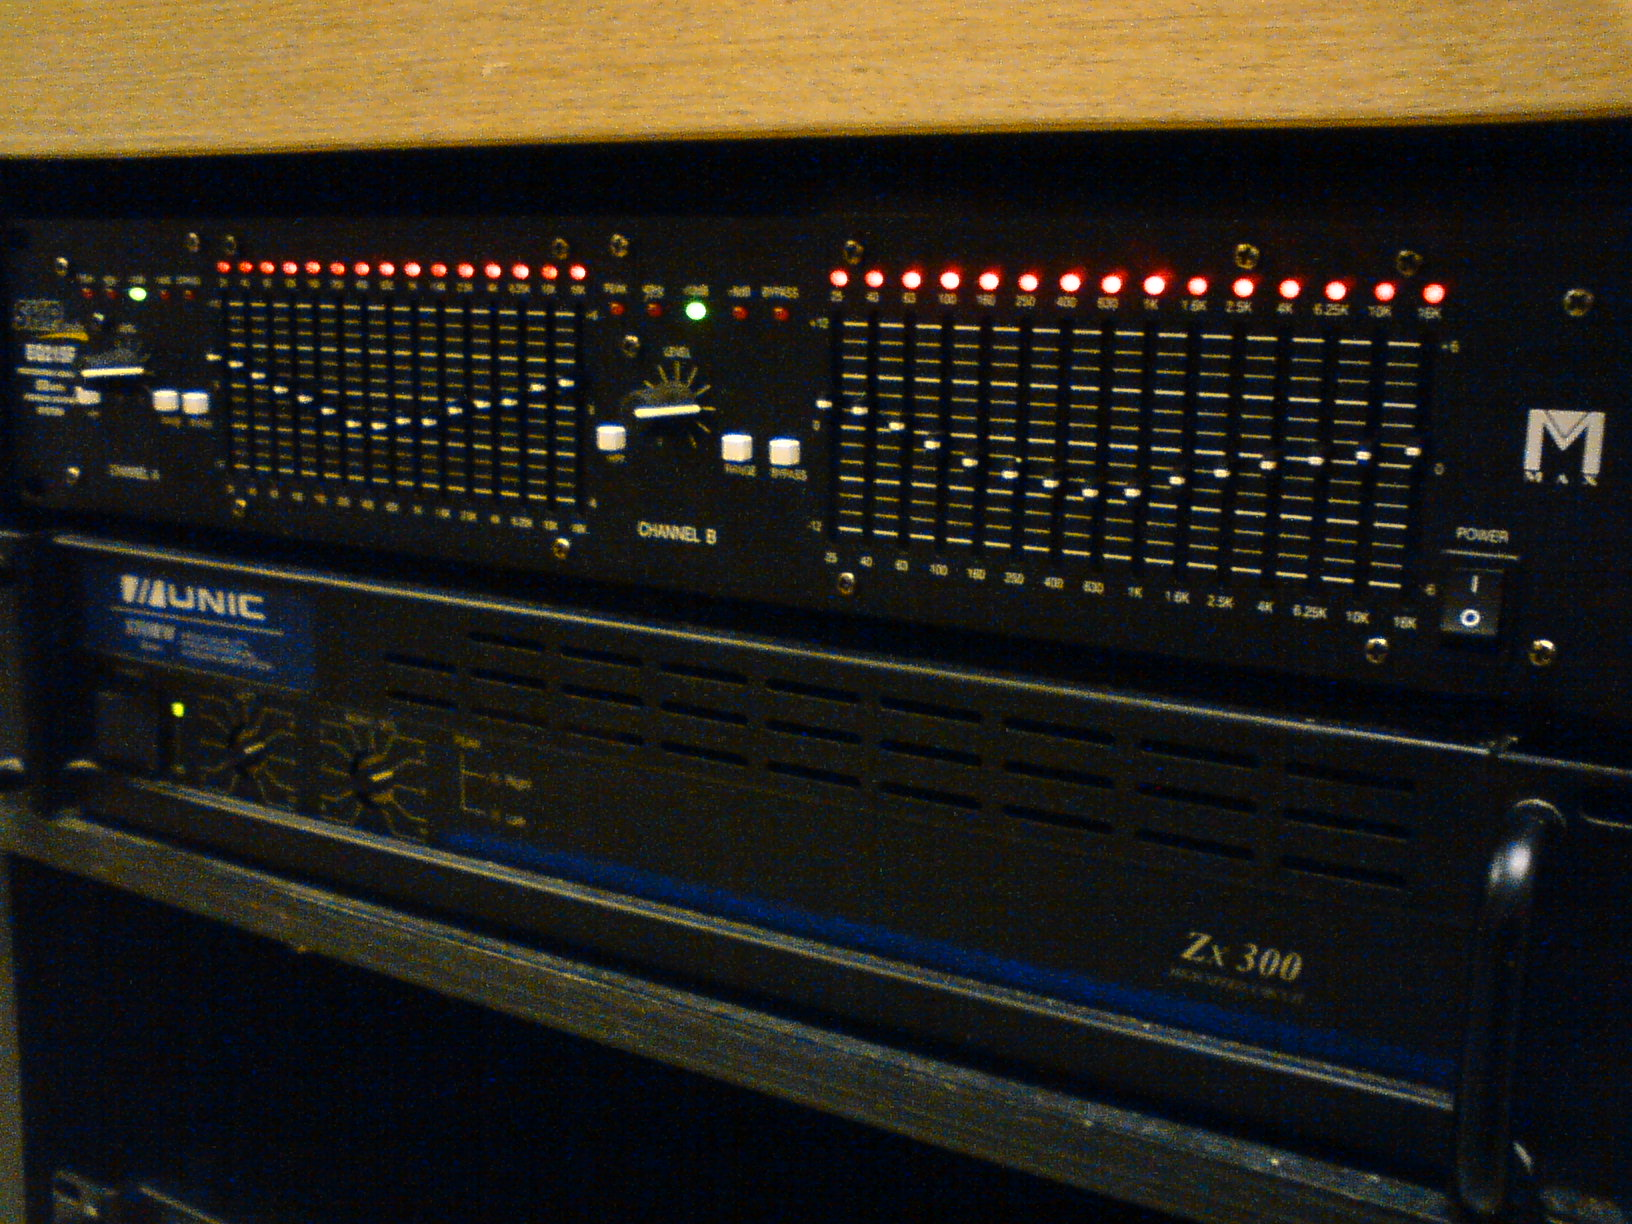

In [1]:
from IPython.display import display, Image
display(Image(filename="Graphic_equalizer.jpg", width=500))

$$
  {\tilde{d}_{f_{i}}\, \tilde{s}_{f_{i}}}
$$

$$
  \frac{\tilde{d}_{f_{i}}\, \tilde{s}_{f_{i}}} {\tilde{n}_{f_{i}}^{2}}
$$

$$
  \frac{\tilde{d}_{f_{i}}\, \tilde{s}_{f_{i}}} {\tilde{n}_{f_{i}}^{2}}\,
  \cos \left[ \delta\phi_{f_i} \right]
$$

$$
  \frac{\tilde{d}_{f_{i}}\, \tilde{s}_{f_{i}}} {\tilde{n}_{f_{i}}^{2}}\,
  \cos \left[ \delta\phi_{f_i} + f_{i}\, \delta t \right]
$$

$$
  \sum_{f_{i}} \frac{\tilde{d}_{f_{i}}\, \tilde{s}_{f_{i}}} {\tilde{n}_{f_{i}}^{2}}\,
  \cos \left[ \delta\phi_{f_i} + f_{i}\, \delta t \right]
$$

$$
  \big\langle d \big| s \big\rangle_{\delta t}
  = \sum_{f_{i}} \frac{\tilde{d}_{f_{i}}\, \tilde{s}_{f_{i}}} {\tilde{n}_{f_{i}}^{2}}\,
  \cos \left[ \delta\phi_{f_i} + f_{i}\, \delta t \right]
$$

# Matched filtering

<br /><br />

$$
  \big\langle d \big| s \big\rangle_{\delta t}
  = \sum_{f_{i}} \frac{\tilde{d}_{f_{i}}\, \tilde{s}_{f_{i}}} {\tilde{n}_{f_{i}}^{2}}\,
  \cos \left[ \delta\phi_{f_i} + f_{i}\, \delta t \right]
$$

Think of this as either

  - Filtering the data
  - Taking the projection of the signal vector with the data vector

Fourier series are vectors; Fourier space is a vector space.

We've provided the vector space with a "dot product" (which makes it into a Hilbert space).

The dot product accounts for different amounts of noise in the different vector components.

Matched filtering is taking a signal vector and measuring its projection along a template vector.

# Conclusions

Matched filtering:

  - Current GW detectors are like giant microphones
  - There's lots of noise
  - So we filter the data and test for signals

Data analysis:

  - FFTs are great for time series (any periodic signal)
  - Python and Jupyter notebooks are really useful
  - Look at your data in as many ways as possible
  - Don't blindly trust hand-me-down algorithms
  - Don't blindly trust your results
    - Think about whether they make sense
    - Understand all the features
    - Things you don't understand may lead to discovery